                             THE CLIMATE CHANGE DATASET
The datasets was provided by the Food and Agriculture Organization of the United Nations 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
url = "https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning/files/7768140/FoodBalanceSheets_E_Africa_NOFLAG.csv"

dat = pd.read_csv(url, encoding='latin-1')

In [2]:
dat.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [3]:
# check the datasets numbers of rows and colums
dat.shape

(60943, 12)

In [4]:
# check the types of data that made up the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [6]:
# check for missing data
dat.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

We observed that there was filling data in year 2014, 2015, 2016, 2017 and 2018 

In [7]:
# let fill in the missing data in the datasets
dat.Y2014 = dat.Y2014.fillna(method='ffill')
dat.Y2015 = dat.Y2015.fillna(method='ffill')
dat.Y2016 = dat.Y2016.fillna(method='ffill')
dat.Y2017 = dat.Y2017.fillna(method='ffill')
dat.Y2018 = dat.Y2018.fillna(method='ffill')

In [8]:
# Let check to confirm the results above
dat.isna().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [9]:
# Let check the summary statistics of the datasets
dat.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,60943.000000,60943.000000,60943.000000,60943.000000,60943.000000
mean,134.265576,2687.176706,3814.856456,133.388397,135.100589,136.413022,139.046607,143.364397
std,72.605709,146.055739,2212.007033,1553.531258,1598.401439,1636.795941,1653.189546,1706.968053
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.070000,0.060000,0.060000,0.080000,0.050000
75%,195.000000,2775.000000,5511.000000,8.000000,8.000000,8.000000,8.690000,8.200000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [10]:
# Let check the correlation of the dataset
dat.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.005899,0.005430,0.005366,0.004916,0.006050
Item Code,-0.005159,1.000000,-0.024683,0.022334,0.020994,0.020235,0.021982,0.020665
Element Code,-0.000209,-0.024683,1.000000,0.024271,0.023852,0.023288,0.023458,0.023983
Y2014,0.005899,0.022334,0.024271,1.000000,0.986107,0.985421,0.991243,0.981926
Y2015,0.005430,0.020994,0.023852,0.986107,1.000000,0.994750,0.979359,0.984404
Y2016,0.005366,0.020235,0.023288,0.985421,0.994750,1.000000,0.982299,0.989360
Y2017,0.004916,0.021982,0.023458,0.991243,0.979359,0.982299,1.000000,0.988001
Y2018,0.006050,0.020665,0.023983,0.981926,0.984404,0.989360,0.988001,1.000000


In [11]:
# Let group the areas of the datasets
dat.groupby('Area')['Area'].count()

Area
Algeria                        1313
Angola                         1424
Benin                          1285
Botswana                       1378
Burkina Faso                   1409
Cabo Verde                     1260
Cameroon                       1460
Central African Republic       1344
Chad                           1343
Comoros                          45
Congo                          1413
Côte d'Ivoire                  1467
Djibouti                       1095
Egypt                          1488
Eswatini                       1284
Ethiopia                       1447
Ethiopia PDR                     39
Gabon                          1245
Gambia                         1168
Ghana                          1354
Guinea                         1410
Guinea-Bissau                  1128
Kenya                          1560
Lesotho                        1150
Liberia                        1206
Madagascar                     1439
Malawi                         1447
Mali                   

In [13]:
# Let check the total production of each country for year 2017 
dat.groupby(['Area'], as_index=False).Y2017.count()

,Area,Y2017
0,Algeria,1313
1,Angola,1424
2,Benin,1285
3,Botswana,1378
4,Burkina Faso,1409
5,Cabo Verde,1260
6,Cameroon,1460
7,Central African Republic,1344
8,Chad,1343
9,Comoros,45


Kenya has the hightest sum of Agricultural production of 1560 and while Ethiopia has the smallest with 39 in the year 2017

In [15]:
#Let group the unit of the datasets base on measurement used
dat.groupby('Unit')['Unit'].count()

Unit
1000 persons          45
1000 tonnes        40933
g/capita/day       10046
kcal/capita/day     5014
kg                  4905
Name: Unit, dtype: int64

In [17]:
# Let group the Element of production for the year 2014
dat.groupby(['Element']).Y2014.count()

Element
Domestic supply quantity                  5295
Export Quantity                           4403
Fat supply quantity (g/capita/day)        5023
Feed                                      1319
Food                                      4941
Food supply (kcal/capita/day)             5014
Food supply quantity (kg/capita/yr)       4905
Import Quantity                           5139
Losses                                    2009
Other uses (non-food)                     1732
Processing                                2010
Production                                3881
Protein supply quantity (g/capita/day)    5023
Residuals                                 4655
Seed                                       762
Stock Variation                           4232
Total Population - Both sexes               45
Tourist consumption                        555
Name: Y2014, dtype: int64

In [18]:
# Let group the Element of production for the year 2015
dat.groupby(['Element']).Y2015.count()

Element
Domestic supply quantity                  5295
Export Quantity                           4403
Fat supply quantity (g/capita/day)        5023
Feed                                      1319
Food                                      4941
Food supply (kcal/capita/day)             5014
Food supply quantity (kg/capita/yr)       4905
Import Quantity                           5139
Losses                                    2009
Other uses (non-food)                     1732
Processing                                2010
Production                                3881
Protein supply quantity (g/capita/day)    5023
Residuals                                 4655
Seed                                       762
Stock Variation                           4232
Total Population - Both sexes               45
Tourist consumption                        555
Name: Y2015, dtype: int64

In [19]:
# Let group the Element of production for the year 2016
dat.groupby(['Element']).Y2016.count()

Element
Domestic supply quantity                  5295
Export Quantity                           4403
Fat supply quantity (g/capita/day)        5023
Feed                                      1319
Food                                      4941
Food supply (kcal/capita/day)             5014
Food supply quantity (kg/capita/yr)       4905
Import Quantity                           5139
Losses                                    2009
Other uses (non-food)                     1732
Processing                                2010
Production                                3881
Protein supply quantity (g/capita/day)    5023
Residuals                                 4655
Seed                                       762
Stock Variation                           4232
Total Population - Both sexes               45
Tourist consumption                        555
Name: Y2016, dtype: int64

In [20]:
# Let group the Element of production for the year 2017
dat.groupby(['Element']).Y2017.count()

Element
Domestic supply quantity                  5295
Export Quantity                           4403
Fat supply quantity (g/capita/day)        5023
Feed                                      1319
Food                                      4941
Food supply (kcal/capita/day)             5014
Food supply quantity (kg/capita/yr)       4905
Import Quantity                           5139
Losses                                    2009
Other uses (non-food)                     1732
Processing                                2010
Production                                3881
Protein supply quantity (g/capita/day)    5023
Residuals                                 4655
Seed                                       762
Stock Variation                           4232
Total Population - Both sexes               45
Tourist consumption                        555
Name: Y2017, dtype: int64

In [21]:
# Let group the Element of production for the year 2018
dat.groupby(['Element']).Y2018.count()

Element
Domestic supply quantity                  5295
Export Quantity                           4403
Fat supply quantity (g/capita/day)        5023
Feed                                      1319
Food                                      4941
Food supply (kcal/capita/day)             5014
Food supply quantity (kg/capita/yr)       4905
Import Quantity                           5139
Losses                                    2009
Other uses (non-food)                     1732
Processing                                2010
Production                                3881
Protein supply quantity (g/capita/day)    5023
Residuals                                 4655
Seed                                       762
Stock Variation                           4232
Total Population - Both sexes               45
Tourist consumption                        555
Name: Y2018, dtype: int64

In [23]:
# Let group the items in the datasets
dat.groupby('Item')['Item'].count()

Item
Alcohol, Non-Food      283
Alcoholic Beverages    564
Animal Products        135
Animal fats            639
Apples and products    517
                      ... 
Vegetables, Other      583
Vegetal Products       135
Wheat and products     653
Wine                   497
Yams                   383
Name: Item, Length: 119, dtype: int64

VISUALIZATION OF THE DATASETS

Text(0.5, 0, 'Climate Change Area')

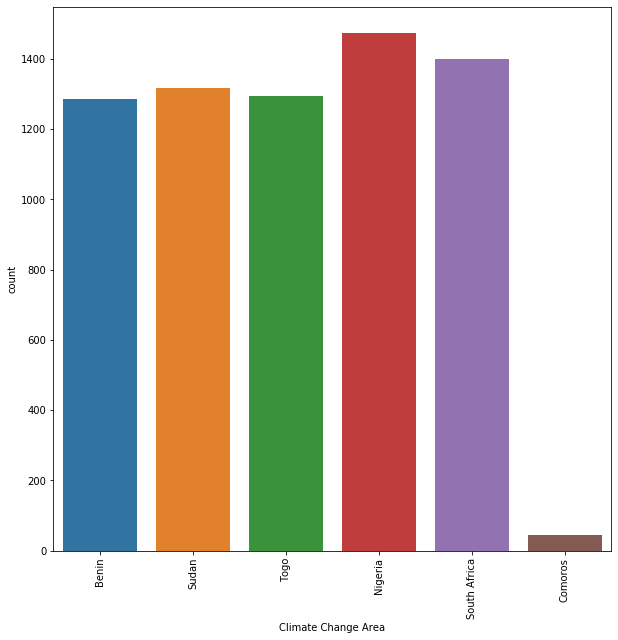

In [25]:
# Let plot the area of the dataset in bar chart
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
dat_area = pd.DataFrame({'Area':['Benin','Sudan','Togo','Nigeria','South Africa','Comoros'],
                        'count':[1285, 1316, 1294, 1474, 1399, 45]})
sns.barplot(data=dat_area, x='Area', y='count')
plt.xlabel('Climate Change Area')

Text(0.5, 0, 'Climate Change Element')

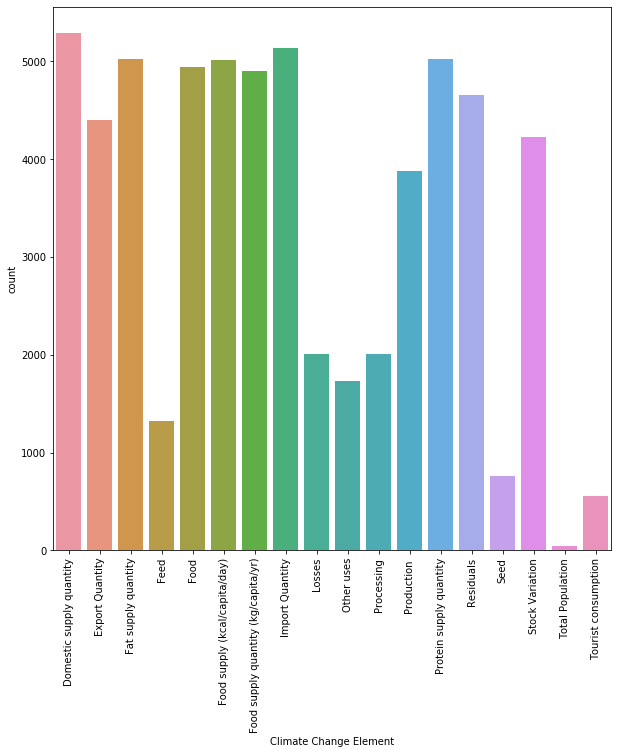

In [26]:
# Let plot the area of production for the year 2018

plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)

dat_ele = pd.DataFrame({'Element':['Domestic supply quantity','Export Quantity','Fat supply quantity',
                                   'Feed','Food','Food supply (kcal/capita/day)','Food supply quantity (kg/capita/yr)',
                                   'Import Quantity','Losses','Other uses','Processing','Production ','Protein supply quantity',
                                   'Residuals','Seed','Stock Variation','Total Population','Tourist consumption'], 
                        'count':['5295','4403','5023','1319','4941','5014','4905','5139','2009','1732','2010','3881','5023',
                                '4655','762','4232','45','555']
                       })
sns.barplot(data=dat_ele, x='Element', y='count')
plt.xlabel('Climate Change Element')

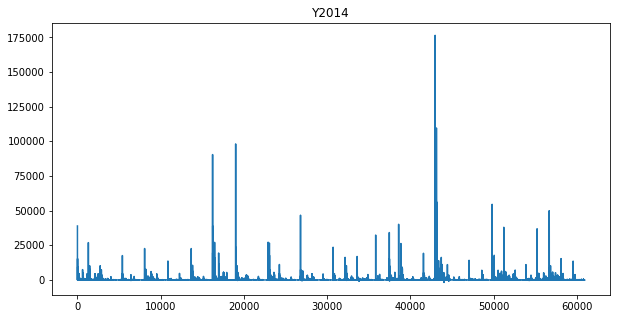

In [31]:
dat.Y2014.plot(figsize=(10,5), title='Y2014')